# INSTALLING AND IMPORTING NECESSARY

In [ ]:
import pandas as pd
%pip install matplotlib
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

In [ ]:
# UPLOADING THE SCRAPPED DATASET (DATASET HAVE BEEN SCRAPPED FROM GOOGLE MAP USING INSTANT WEB SCRAPPER AND MERGED WITH COMMAAD PROMPT)

In [224]:
data= pd.read_csv("D:/combined data set.csv")

In [225]:
data.head(5)

,Studio Name,Service type,Rating,Address,City,Contact Number,Website
0,Photocity Digital Studio,Photography service,4.6,"SRS Opp. Whitefield Rly, Prasanthi Fields, St...",Bangalore,094819 03450,https://photocitydigitalstudio.business.site/?...
1,B R Wedding Filmer,Photography studio,4.2,"Next to Udupi Garden Hotel ,Channsandra,Kadug...",Bangalore,098451 84765,https://pickleit.in/studio/brweddingfilmer
2,Nandi Digital Photo Studio,Photography studio,3.8,"#L-2,M,Krishnachari Building,Seegehalli Kanna...",Bangalore,099014 51618,NaN
3,Memories Lane Studio - Newborn Baby Photoshoot...,Photographer,5,NaN,Bangalore,NaN,https://www.memorieslanestudio.com/
4,JV Studios,Photography studio,4.9,"1st floor, No: 34, Ramamurthi Nagar Main Rd, n...",Bangalore,099477 58677,NaN


In [226]:
data.describe()

,Studio Name,Service type,Rating,Address,City,Contact Number,Website
count,1122,1121,1091,928,1124,893,460
unique,1097,38,30,749,8,886,449
top,Konica Color Lab & Studio,Photography studio,5,"New Delhi, Delhi",New Delhi,098184 35399,http://www.gkvale.com/
freq,3,401,137,73,199,2,4


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Studio Name     1122 non-null   object
 1   Service type    1121 non-null   object
 2   Rating          1091 non-null   object
 3   Address         928 non-null    object
 4   City            1124 non-null   object
 5   Contact Number  893 non-null    object
 6   Website         460 non-null    object
dtypes: object(7)
memory usage: 61.8+ KB


In [ ]:
#FINDING THE NULL VALUES

In [228]:
data.isnull().sum()

Studio Name         5
Service type        6
Rating             36
Address           199
City                3
Contact Number    234
Website           667
dtype: int64

In [ ]:
# PLOTTING HEATMAP TO VISUALISE  THE NULL VALUES(HERE THE EMPTY WHITE SPACES SHOWS THE NULL VALUES)

<Axes: >

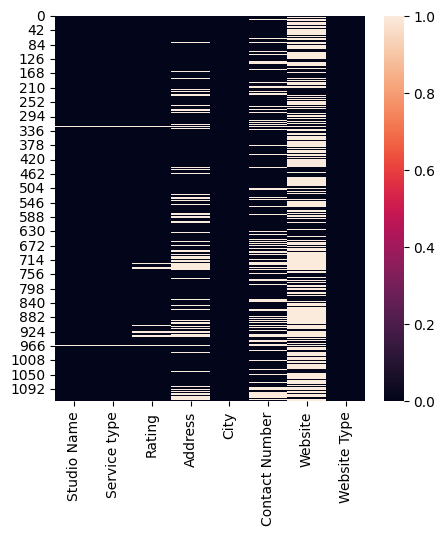

In [172]:
plt.figure(figsize=(5,5))
sns.heatmap(data.isnull())

In [ ]:
def classify_website(Website):
    if pd.isnull(Website):
        return 'No website'
    elif 'google' in Website.lower():
        return 'Google website'
    else:
        return 'Own website'

In [ ]:
data['Website Type'] = data['Website'].apply(classify_website)

In [ ]:
data.head(10)

In [ ]:
data.to_csv('D:/Chandini/website4.csv')

In [ ]:
data1=pd.read_csv("D:/Chandini/website4.csv")

In [ ]:
data1.head(5)

In [ ]:
data1.isnull().sum()

In [176]:
data1=data1.fillna('NA')

In [177]:
data1.head(3)

,Studio Name,Service type,Rating,Address,City,Contact Number,Website,Website Type
0,Photocity Digital Studio,Photography service,4.6,"SRS Opp. Whitefield Rly, Prasanthi Fields, St...",Bangalore,094819 03450,https://photocitydigitalstudio.business.site/?...,Own website
1,B R Wedding Filmer,Photography studio,4.2,"Next to Udupi Garden Hotel ,Channsandra,Kadug...",Bangalore,098451 84765,https://pickleit.in/studio/brweddingfilmer,Own website
2,Nandi Digital Photo Studio,Photography studio,3.8,"#L-2,M,Krishnachari Building,Seegehalli Kanna...",Bangalore,099014 51618,NA,No website


In [221]:
grouped_data1= data1.groupby(['City', 'Website Type']).size().unstack().fillna(0)

In [179]:
grouped_data1['Total'] = grouped_data1.sum(axis=1)

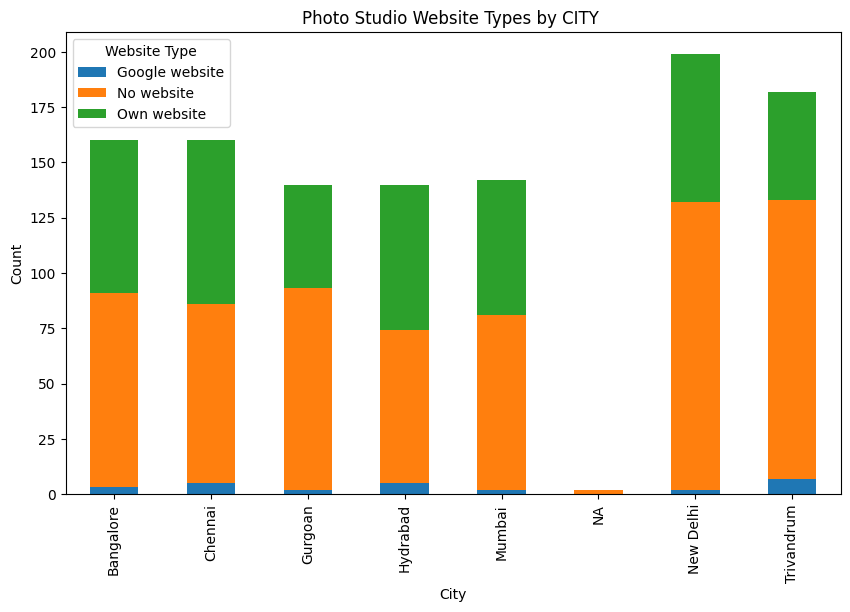

In [230]:
grouped_data1.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Photo Studio Website Types by CITY ')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Website Type')
plt.show()

In [240]:
grouped_data1['Total'] = grouped_data1.sum(axis=1)

In [241]:
for City in grouped_data1.index:
    own_website_count = grouped_data1.loc[City, 'Own website']
    google_website_count = grouped_data1.loc[City, 'Google website']
    no_website_count = grouped_data1.loc[City, 'No website']
    total_count = grouped_data1.loc[City, 'Total']

In [242]:
print(f"City: {City}")
print(f"Own Website: {own_website_count} ({(own_website_count/total_count)*100:.2f}%)")
print(f"Google Website: {google_website_count} ({(google_website_count/total_count)*100:.2f}%)")
print(f"No Website: {no_website_count} ({(no_website_count/total_count)*100:.2f}%)\n")

City: Trivandrum
Own Website: 49.0 (26.92%)
Google Website: 7.0 (3.85%)
No Website: 126.0 (69.23%)



In [ ]:
# GROUPING THE WEBSITE DATA OF EACH CITY  BASED ON WEBSITE TYPE

In [243]:
grouped_data2 = grouped_data1.sort_values('Total', ascending=False)

In [210]:
print(grouped_data2)

Website Type  Google website  No website  Own website  Total
City                                                        
New Delhi                2.0       130.0         67.0  995.0
Trivandrum               7.0       126.0         49.0  910.0
Bangalore                3.0        88.0         69.0  800.0
Chennai                  5.0        81.0         74.0  800.0
Mumbai                   2.0        79.0         61.0  710.0
Gurgoan                  2.0        91.0         47.0  700.0
Hydrabad                 5.0        69.0         66.0  700.0
NA                       0.0         2.0          0.0   10.0


In [ ]:
#THE ABOVE CHART SHOWS THAT IN BANGALORE, CHENNAI, MUMBAI,GURGOAN AND HYDRABAD THE PERCENTAGE OF PEOPLE OWNING THEIR OWN WEBSITE IS MORE WHEREAS IN NEW DELHI AND TRIVANDRUM IT IS COMPARITIVELY LESS.

In [ ]:
# PLOTTING PIE CHART TO SEE THE PERCENTAGE DISTRIBUTION OF TYPE OF WEBSITE PHOTO STUDIOS OWN

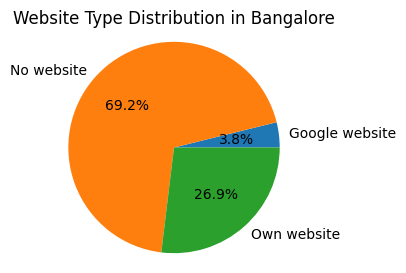

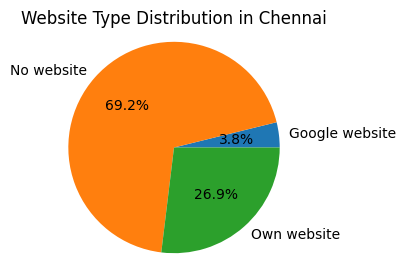

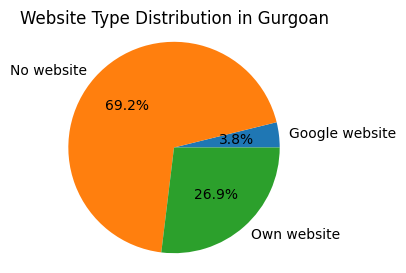

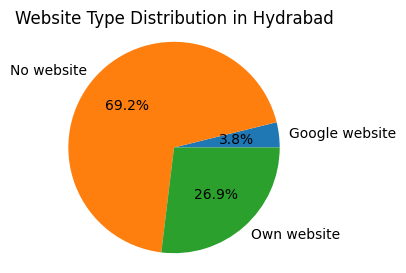

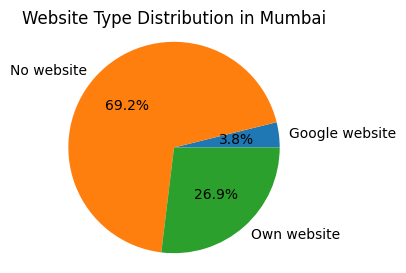

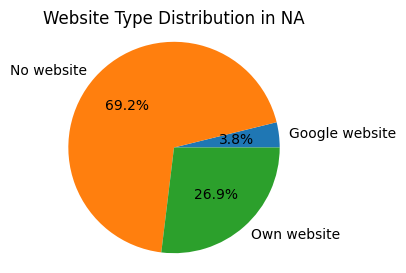

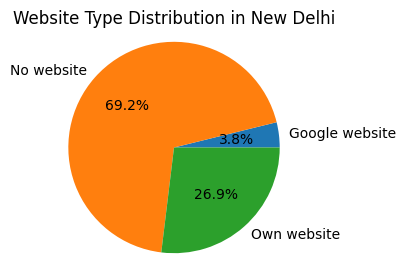

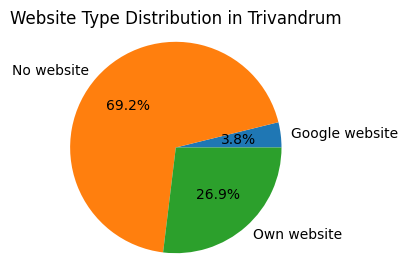

In [222]:
for state in grouped_data1.index:
    # Get the website type counts for the current state
    website_type_counts = grouped_data1.loc[City]
    
    # Create a pie chart
    plt.figure(figsize=(3, 3))
    plt.pie(website_type_counts, labels=website_type_counts.index, autopct='%1.1f%%')
    plt.title(f"Website Type Distribution in {state}")
    plt.axis('equal')
    plt.show()

In [ ]:
# THE PIE CHART CLEARLY SHOWS THAT  EVEN IN MAJOR CITIES OF  INDIA, MAJOR PERCENTAGE OF PHOTO STUDIOS DOES NOT OWN A WEBSITE. NEGLIGIBLE AMOUNT OF PHOTOSTUDIOS OWN GOOGLE WEBSITE.
#OWNING A WEBSITE WILL HELP THE PHOTO STUDIOS THE REAH TO THE CUSTOMERS.